In [53]:
import json, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

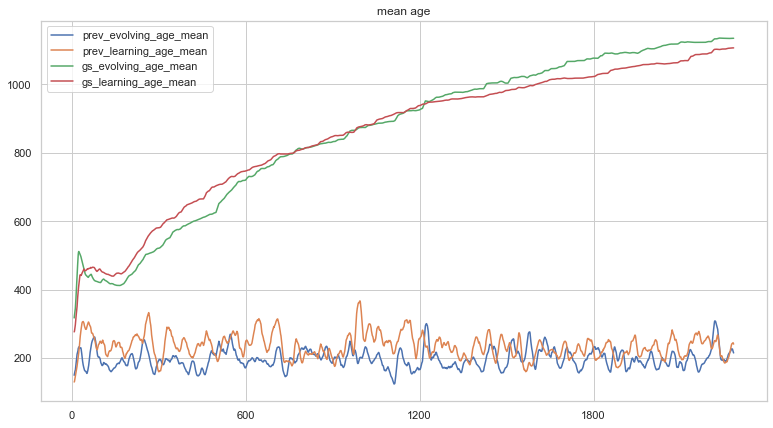

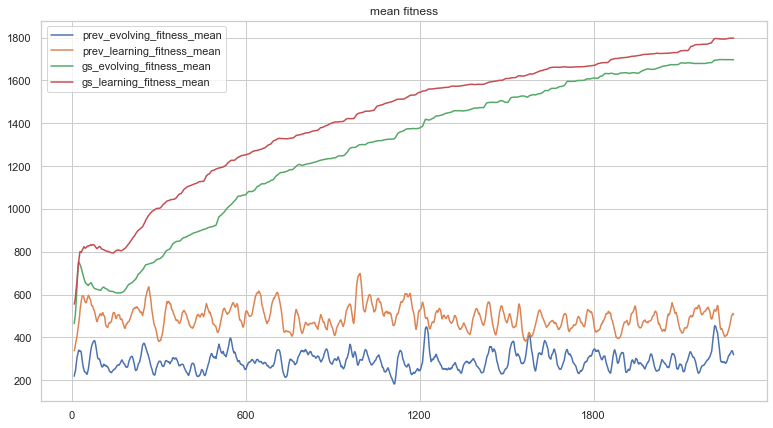

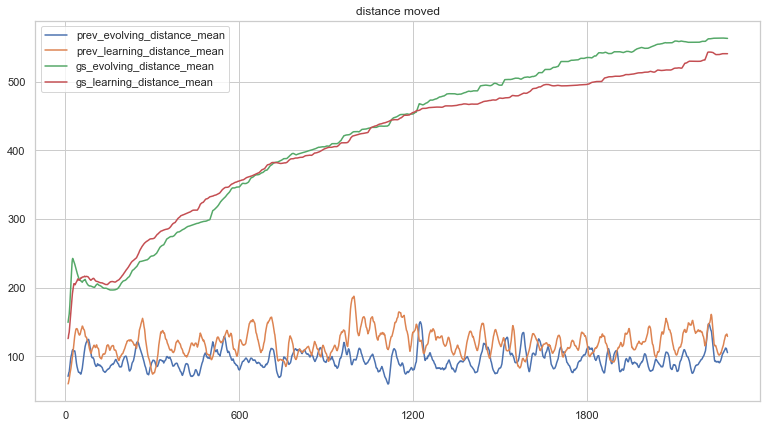

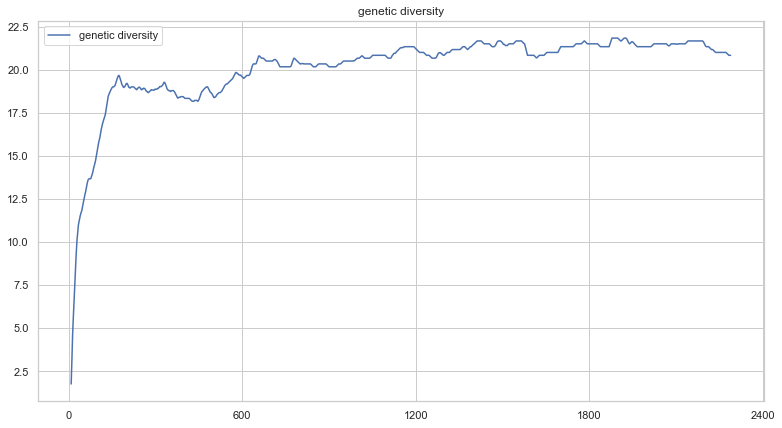

In [148]:
stats = {}
with open("alien_ecology_stats/stats.json", "r") as f:
    stats = json.loads(f.read())

am = [x for x in stats.keys() if "age_mean" in x]
fm = [x for x in stats.keys() if "fitness_mean" in x]
dm = [x for x in stats.keys() if "distance_mean" in x]
tgs = [x for x in stats.keys() if "in_top_" in x]
lad = [x for x in stats.keys() if "learning_action" in x]
ead = [x for x in stats.keys() if "evolving_action" in x]

show = {
        'mean age': am,
        'mean fitness': fm,
        'distance moved': dm,
        'genetic diversity': ["genetic diversity"],
       }

for title, group in show.items():
    if len(group) < 1:
        continue
    min_p = min(len(stats[l]) for l in group)
    #min_p = min(5000, min_p)
    plot_data = {}
    for label in group:
        plot_data[label] = stats[label][-min_p:]
    data = pd.DataFrame(plot_data)
    fig = plt.figure(figsize=(13,7))
    data = data.rolling(10).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=False, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_title(title)
    plt.show()

In [151]:
import pickle
from collections import Counter

with open("alien_ecology_save/genome_store.pkl", "rb") as f:
    genome_store = pickle.load(f)

def gen_printable(gen):
    msg = ""
    for item in gen:
        ch = "Z"
        if int(item) == -1:
            ch = "M"
        elif int(item) == 1:
            ch = "P"
        msg += ch
    return msg
    
unique = []
counts = []
fitness = []
age = []

num_blocks = len(genome_store[0])
print("Blocks: " + str(num_blocks))
for index in range(num_blocks):
    unique.append(set())
    counts.append(Counter())
    fitness.append({})
    age.append({})

print("Entries in genome store: " + str(len(genome_store)))
for index, entry in enumerate(genome_store):
    for block in range(len(entry[0])):
        genome = entry[0][block]
        gpr = gen_printable(genome)
        unique[block].add(gpr)
        counts[block][gpr] += 1
        fitness[block][gpr] = entry[1]
        age[block][gpr] = entry[2]
    
for block in range(num_blocks):
    print("Block: " + str(block) + " unique genomes: " + str(len(unique[block])))
    for x, c in counts[block].most_common(10):
        print("count:", c, "age:", age[block][x], "fitness:", fitness[block][x])
        print(x + " (" + str(len(x)) + ")")
    print()

Blocks: 6
Entries in genome store: 300
Block: 0 unique genomes: 17
count: 65 age: 1068 fitness: 1659.8541363804309
PPMPPPZPPPZMMZPPPZMPZZPMZPPMMMZMZPZMMPZZPZMZPZZZPMPZMMZZZZZPPPMPMPZZMZMM (72)
count: 36 age: 886 fitness: 1268.4646977854973
MZZPPMMMMPMMPMMPPMZZZMPZMZMPMPPZPMMPMMPZMZPMMMMZZMMMPMZZZMZMMMPZZMZPZPZZ (72)
count: 35 age: 946 fitness: 1588.2540800197542
ZZPMPPMMPZPZMPMZPMPZMPMMZZMPPPMPPPPPPMPZPZPZMZZMMZMMZMZZMZPMMZPZPPPPZMMP (72)
count: 35 age: 1050 fitness: 1735.7616134680034
ZPMMZMPZZMMPMPZPPMMPZPZPZZPPMPMZMMZMZMZMPMMMZPPMMZZPPPMMPZPZPZMZPPPMPZZP (72)
count: 17 age: 967 fitness: 1539.9498840953029
PZPPMZMPZMPZPMPZPPPZZZMPPMZMPPMZZPMMMPZPMPPMPMZMZMZZZMMMMMPPPMMZMZMZMPZZ (72)
count: 14 age: 826 fitness: 1285.6125193131372
PMZPZMPMZZZZMPMMMZPZPZZZMPPPPZPMPZPMZPZPZZZMZPMZMMPMPPMZZMMPMMPPPZZZMPPP (72)
count: 14 age: 1058 fitness: 1507.319945010831
MZPZPMZMZMZPZZZMZZPPZPZPZPZZZMPPMMZPZPPMMZMPMPMMZPZZPMPZMZPZPMZZPZMMPPMM (72)
count: 14 age: 931 fitness: 1502.7421369904243
MPMZZZPPP

In [168]:
# Display graph of neural network
inter = {}
for x, c in counts[0].most_common(1):
    genome = x
    index = 0
    # Input node connections to hidden layer
    for inpn in range(4):
        for outn in range(4, 12):
            weight = 0
            if genome[index] == "P":
                weight = 1
            elif genome[index] == "M":
                weight = 1
            if weight != 0:
                if inpn not in inter:
                    inter[inpn] = Counter()
                inter[inpn][outn] = weight
            index += 1
    # Hidden nodes to output nodes
    for inpn in range(4, 12):
        for outn in range(13, 17):
            weight = 0
            if genome[index] == "P":
                weight = 1
            elif genome[index] == "M":
                weight = 1
            if weight != 0:
                if inpn not in inter:
                    inter[inpn] = Counter()
                inter[inpn][outn] = weight
            index += 1
    print(inter)
with open("graph.csv", "w") as f:
    f.write("Source,Target,Weight\n")
    for source, targets in inter.items():
        for target, weight in targets.items():
            f.write(str(source)+","+str(target)+","+str(weight)+"\n")

{0: Counter({4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 11: 1}), 1: Counter({4: 1, 5: 1, 7: 1, 8: 1, 10: 1, 11: 1}), 2: Counter({4: 1, 6: 1, 7: 1, 10: 1, 11: 1}), 3: Counter({5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 11: 1}), 4: Counter({14: 1, 16: 1}), 5: Counter({13: 1, 14: 1}), 6: Counter({13: 1, 15: 1}), 7: Counter({13: 1}), 8: Counter({13: 1, 14: 1, 15: 1}), 9: Counter({13: 1, 14: 1}), 10: Counter({16: 1}), 11: Counter({13: 1, 14: 1, 15: 1, 16: 1})}
